#  `nl_means_layered` 

Applies the non-local means filter to each 2D layer of a 3D image (stack of 2D images) in parallel. This function is applicable in removing noise from SEM images.

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import porespy as ps
from skimage.util import random_noise
import inspect
ps.visualization.set_mpl_style()
inspect.signature(ps.filters.nl_means_layered)

<Signature (im, cores=None, axis=0, patch_size=5, patch_distance=15, h=4)>

## `im`
The input image is a greyscale image with noise to be removed. Let's create a test image:

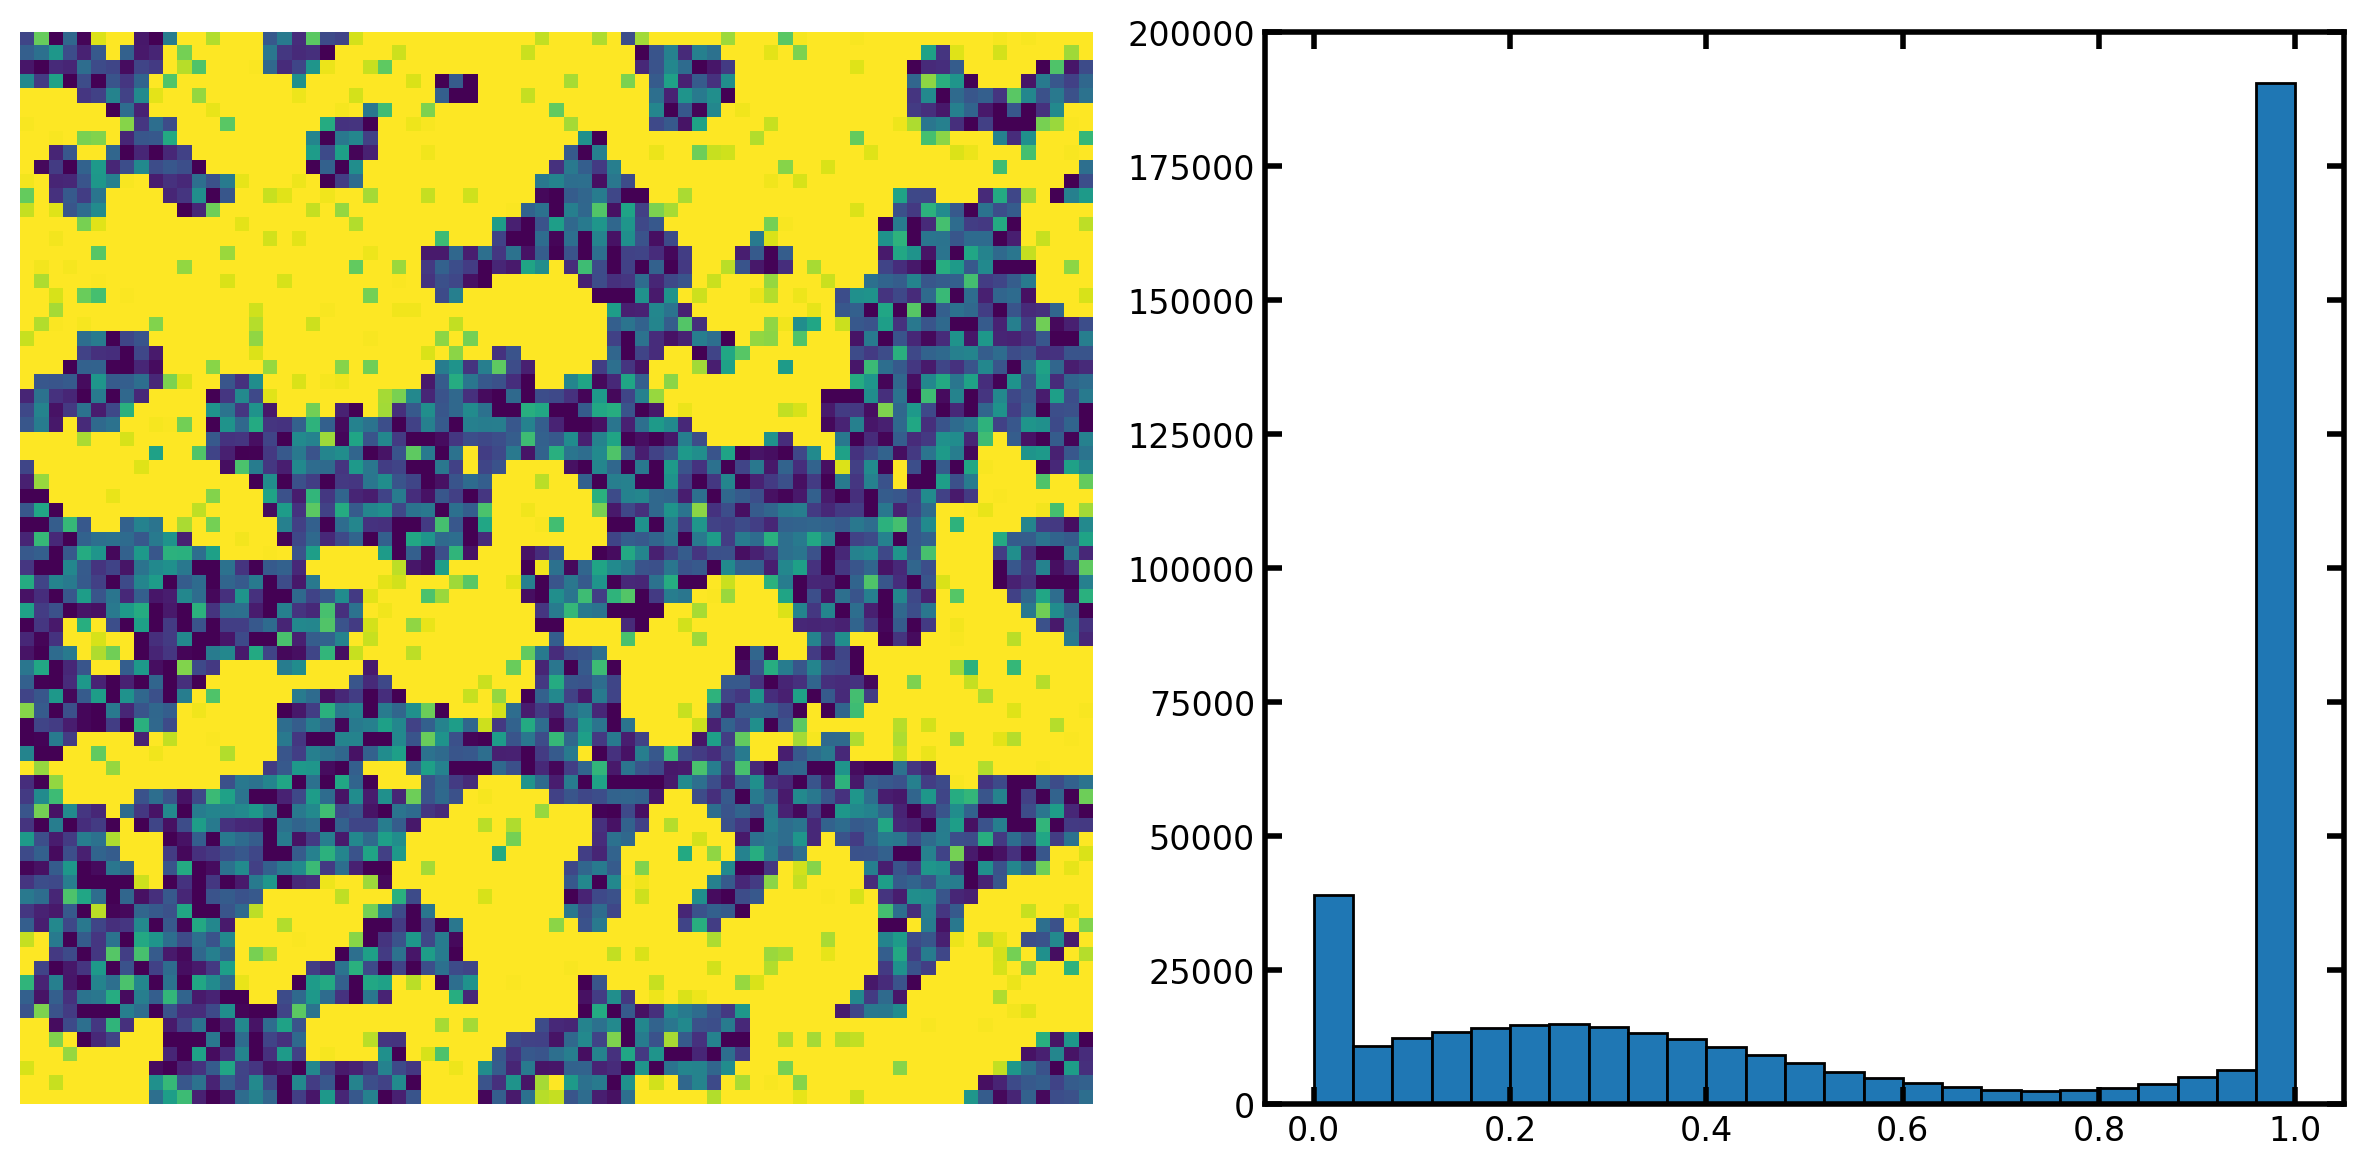

In [43]:
np.random.seed(10)
im = ps.generators.blobs(shape=[75, 75, 75])
im2 = random_noise(im, mode='gaussian', mean=0.24, var=0.05)
fig, ax = plt.subplots(1, 2, figsize=[12, 6])
ax[0].imshow(im2[:, :, 15])
ax[0].axis(False)
ax[1].hist(im2.flatten(), bins=25, edgecolor='k');

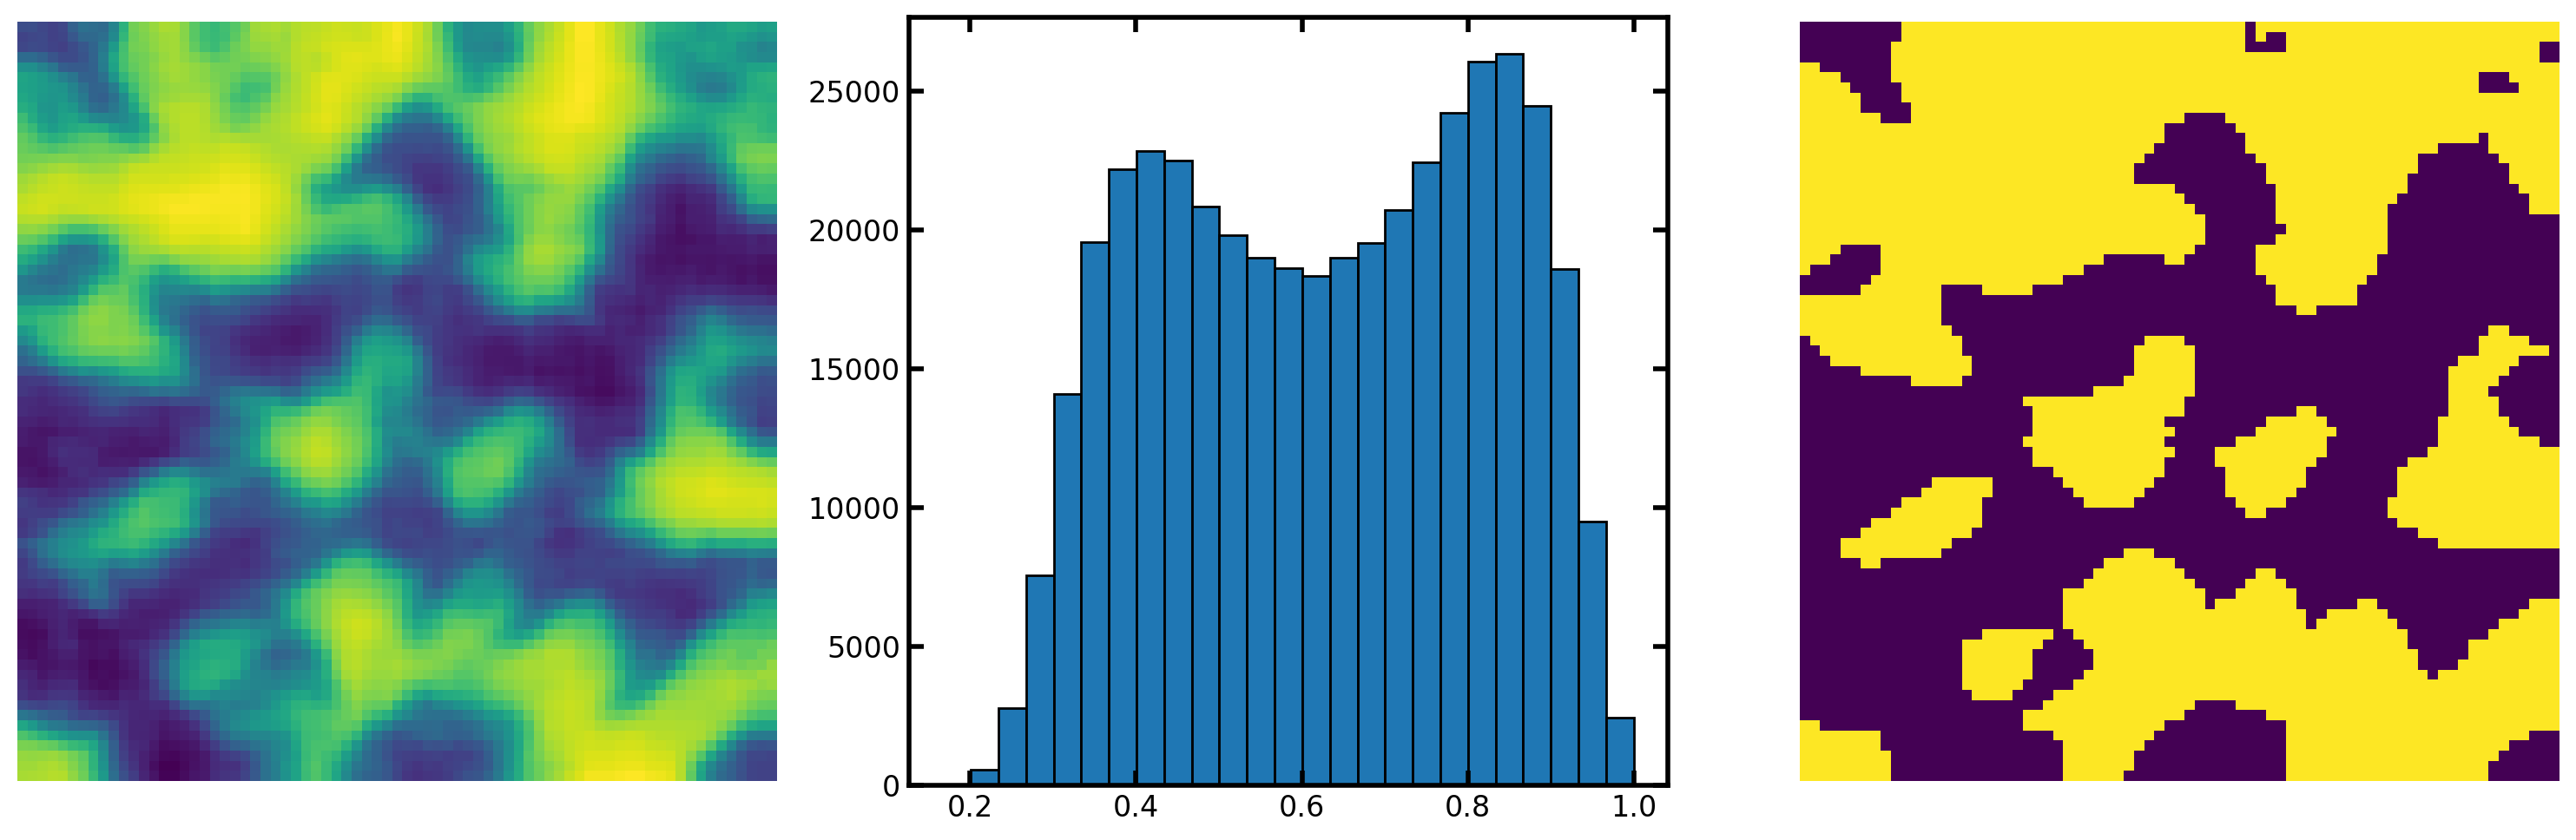

In [48]:
filtered_im = ps.filters.nl_means_layered(im2, axis=2)
fig, ax = plt.subplots(1, 3, figsize=[15, 5])
ax[0].imshow(filtered_im[..., 15])
ax[0].axis(False)
ax[1].hist(filtered_im.flatten(), bins=25, edgecolor='k')
ax[2].imshow(filtered_im[..., 15] > 0.6)
ax[2].axis(False);

## `cores`

The number of cores to use for the processing. The default is all cores. Let's change it to a smaller number (this will slow down the processing time):

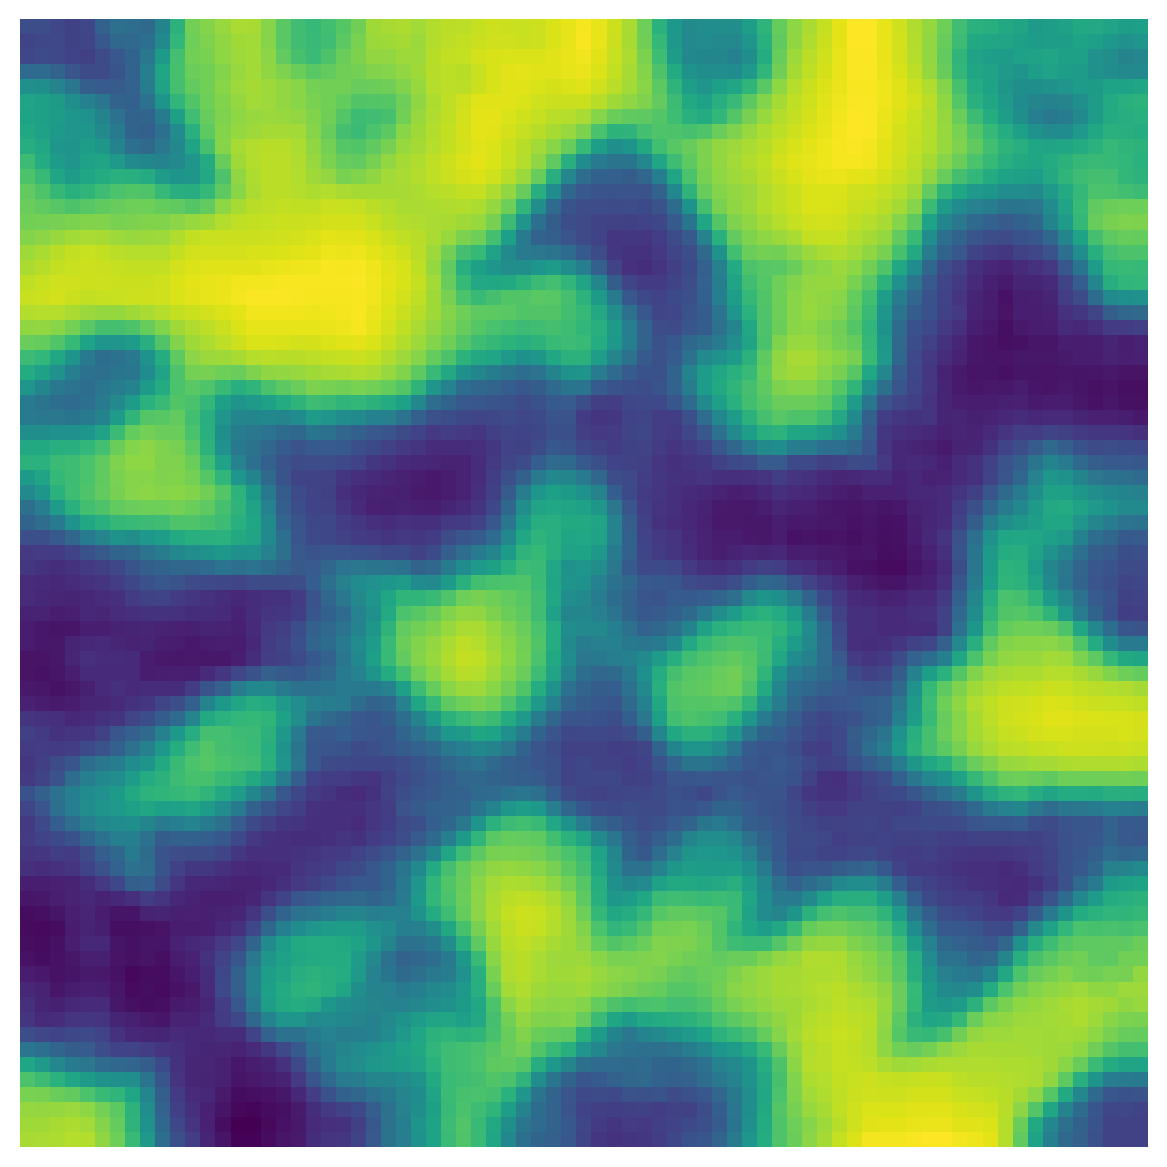

In [49]:
filtered_im = ps.filters.nl_means_layered(im2, axis=2, cores=1)
fig, ax = plt.subplots(1, 1, figsize=[6, 6])
ax.imshow(filtered_im[:, :, 15])
ax.axis(False);

## `axis`

The axis along which 2D slices for the filtering process should be taken. This can be 0,1, or 2 corresponding to x, y, and z axis. By default the slices are taken along x axis. When using tomography images, this should correspond to the axis of rotation of the tomography stage.

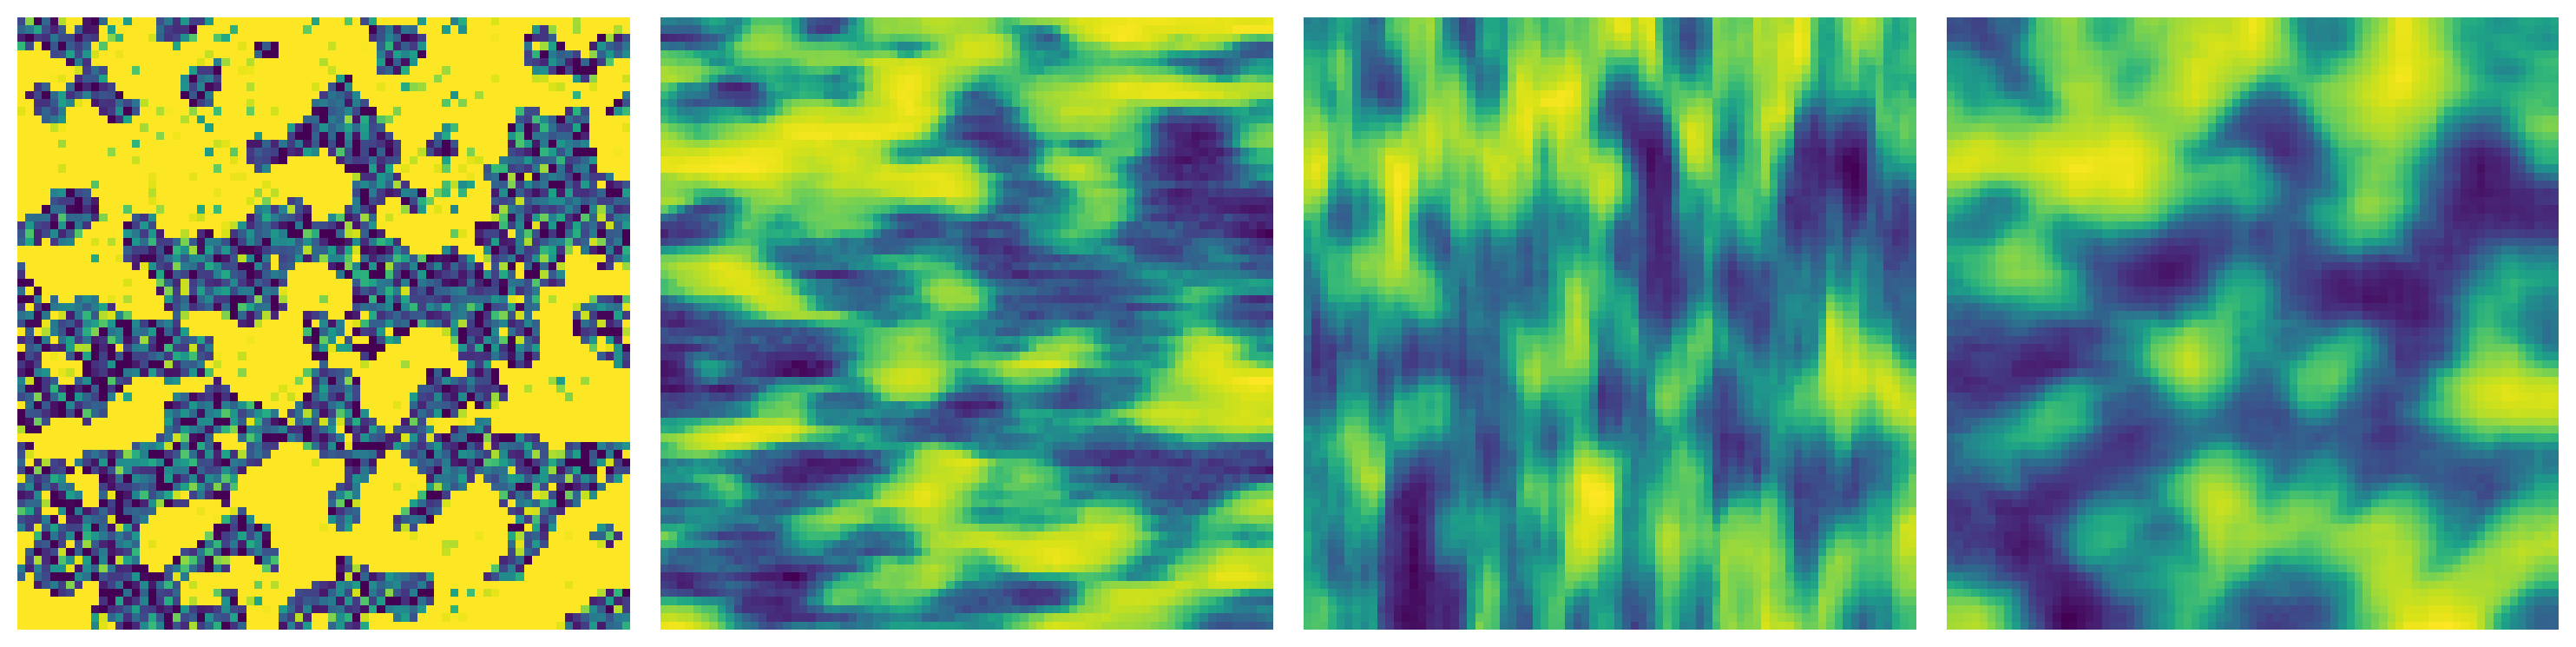

In [50]:
im_x = ps.filters.nl_means_layered(im2, axis=0)
im_y = ps.filters.nl_means_layered(im2, axis=1)
im_z = ps.filters.nl_means_layered(im2, axis=2)
fig, ax = plt.subplots(1, 4, figsize=[15, 5])
ax[0].imshow(im2[..., 15])
ax[0].axis(False);
ax[1].imshow(im_x[..., 15])
ax[1].axis(False);
ax[2].imshow(im_y[..., 15])
ax[2].axis(False);
ax[3].imshow(im_z[..., 15])
ax[3].axis(False);

## `patch_size`

The size of patches used for denoising filter. The default is 5.

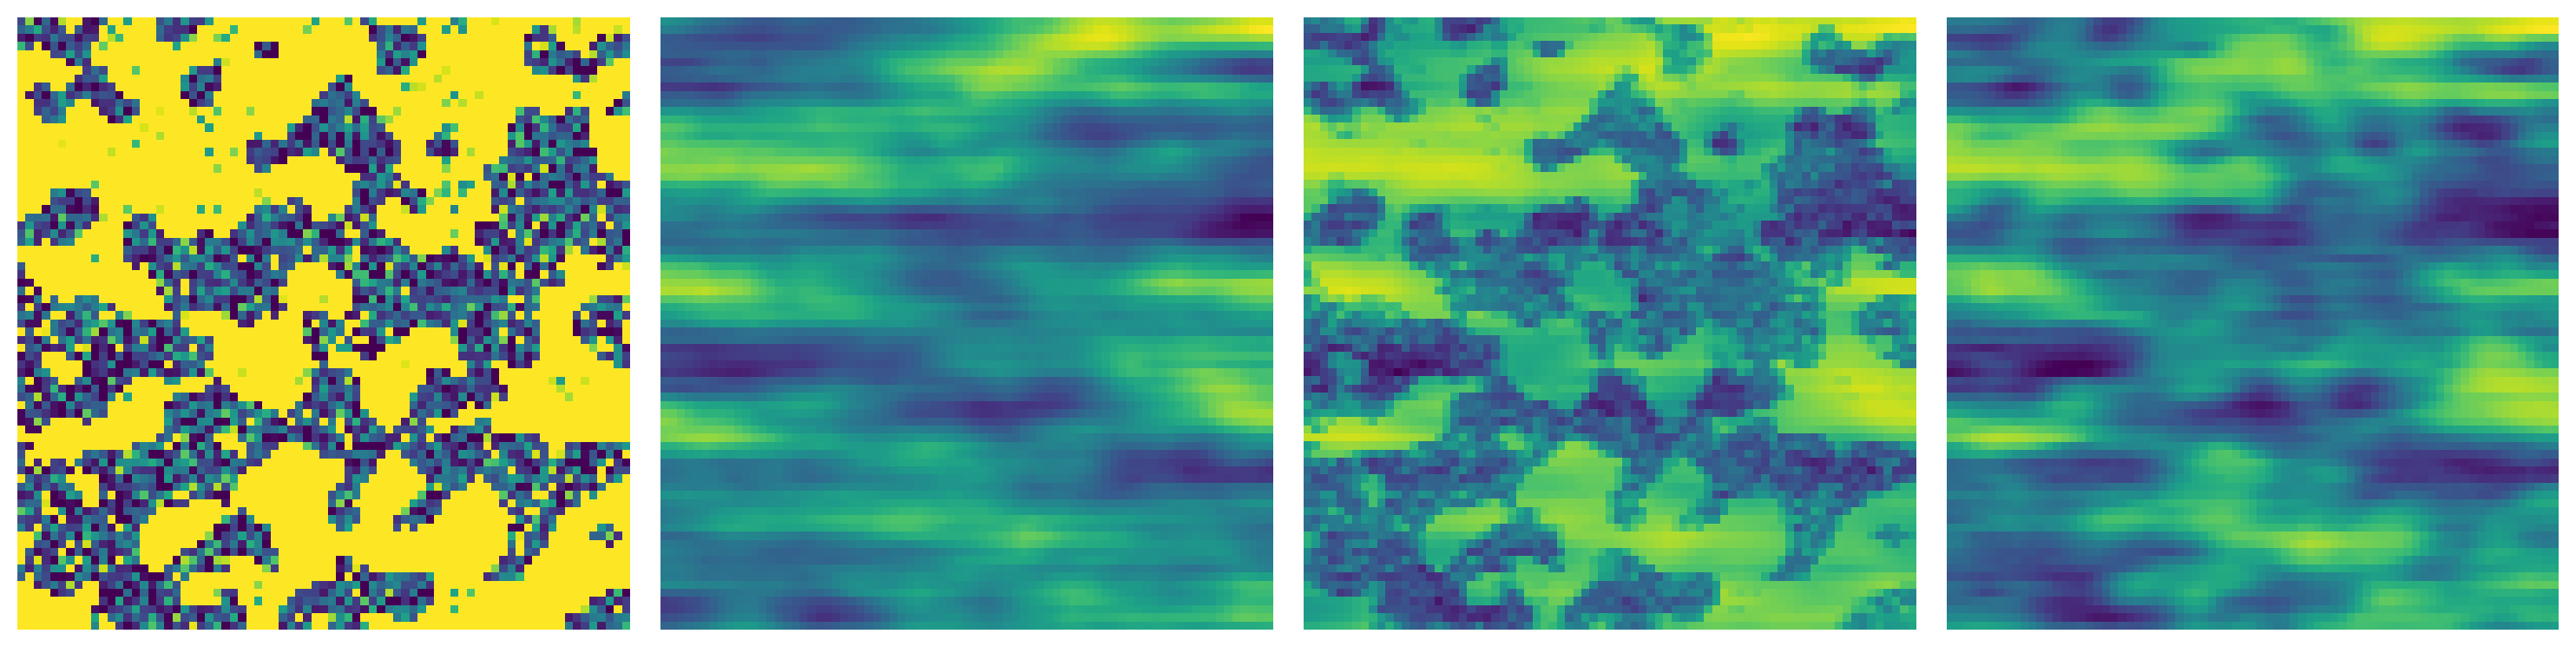

In [51]:
im_1 = ps.filters.nl_means_layered(im2, patch_size=1)
im_2 = ps.filters.nl_means_layered(im2, patch_size=3)
im_3 = ps.filters.nl_means_layered(im2, patch_size=8)
fig, ax = plt.subplots(1, 4, figsize=[15, 5])
ax[0].imshow(im2[..., 15])
ax[0].axis(False);
ax[1].imshow(im_1[..., 15])
ax[1].axis(False);
ax[2].imshow(im_2[..., 15])
ax[2].axis(False);
ax[3].imshow(im_3[..., 15])
ax[3].axis(False);

## `patch_distance`

Maximal distance in pixels where to search patches used for denoising. The default is 15.

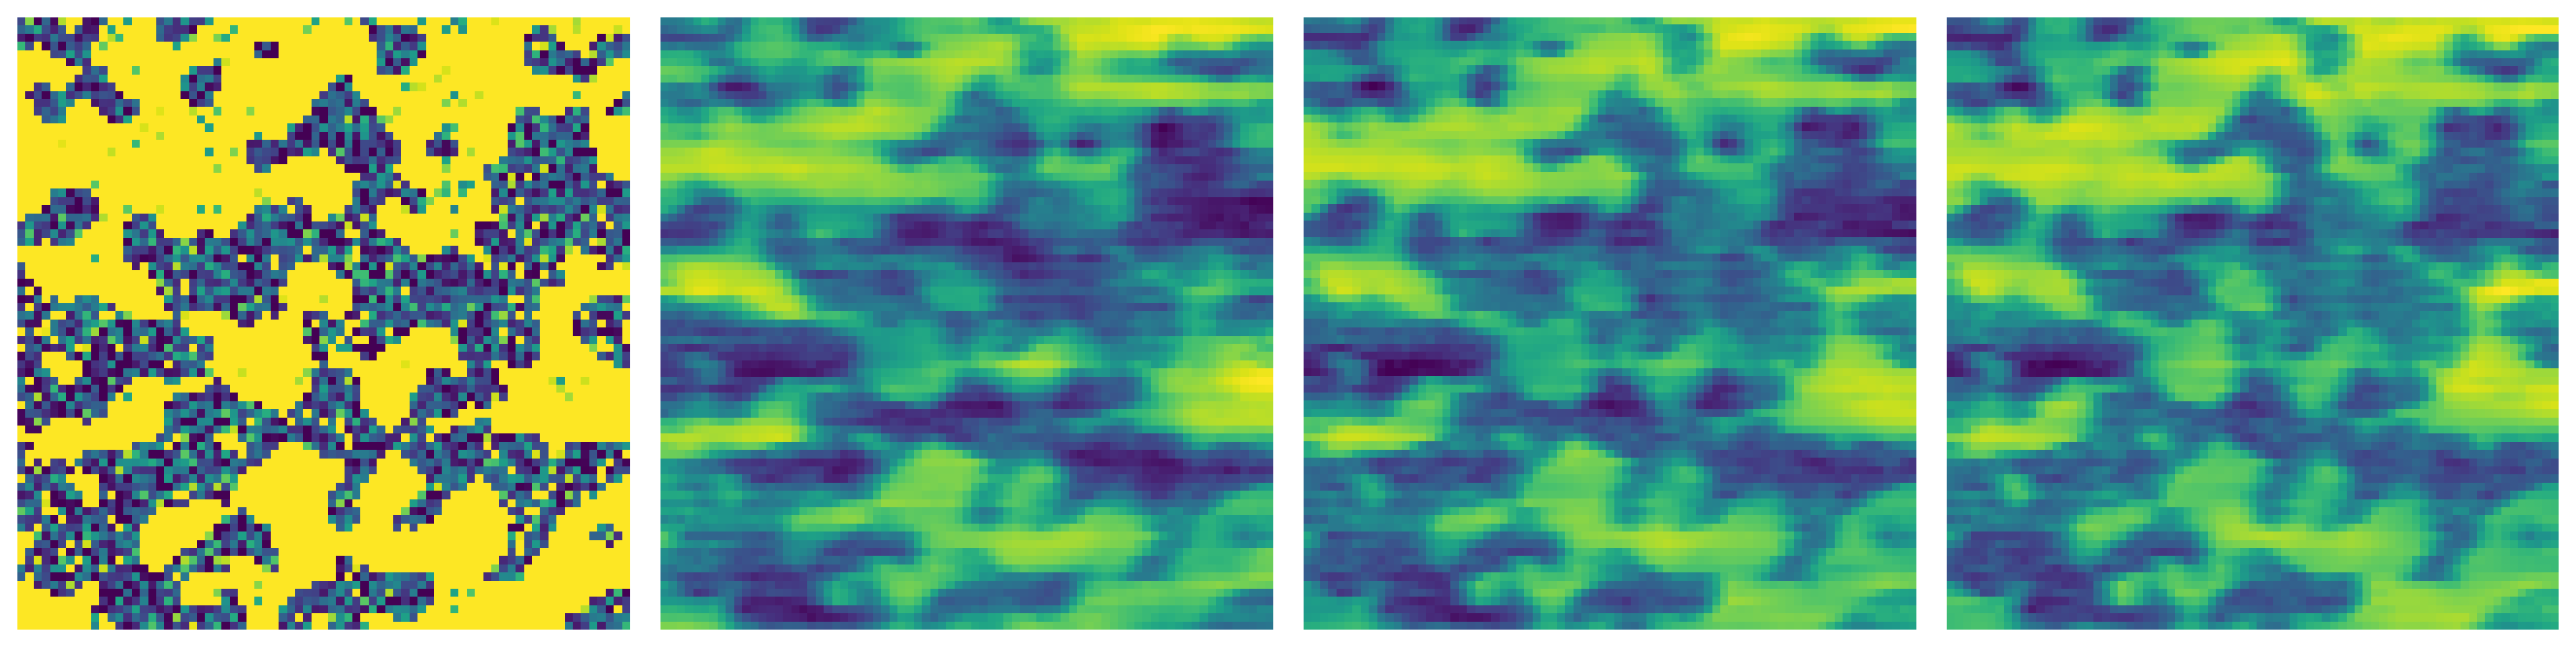

In [52]:
im_1 = ps.filters.nl_means_layered(im2, patch_distance=10)
im_2 = ps.filters.nl_means_layered(im2)
im_3 = ps.filters.nl_means_layered(im2, patch_distance=20)
fig, ax = plt.subplots(1, 4, figsize=[15, 5])
ax[0].imshow(im2[..., 15])
ax[0].axis(False);
ax[1].imshow(im_1[..., 15])
ax[1].axis(False);
ax[2].imshow(im_2[..., 15])
ax[2].axis(False);
ax[3].imshow(im_3[..., 15])
ax[3].axis(False);

## `h`

Cut-off distance (in gray levels). The higher ``h``, the more permissive one is in accepting patches. A higher h results in a
smoother image, at the expense of blurring features. For a Gaussian noise of standard deviation sigma, a rule of thumb is to choose the value of ``h`` to be sigma of slightly less. The default is 4.

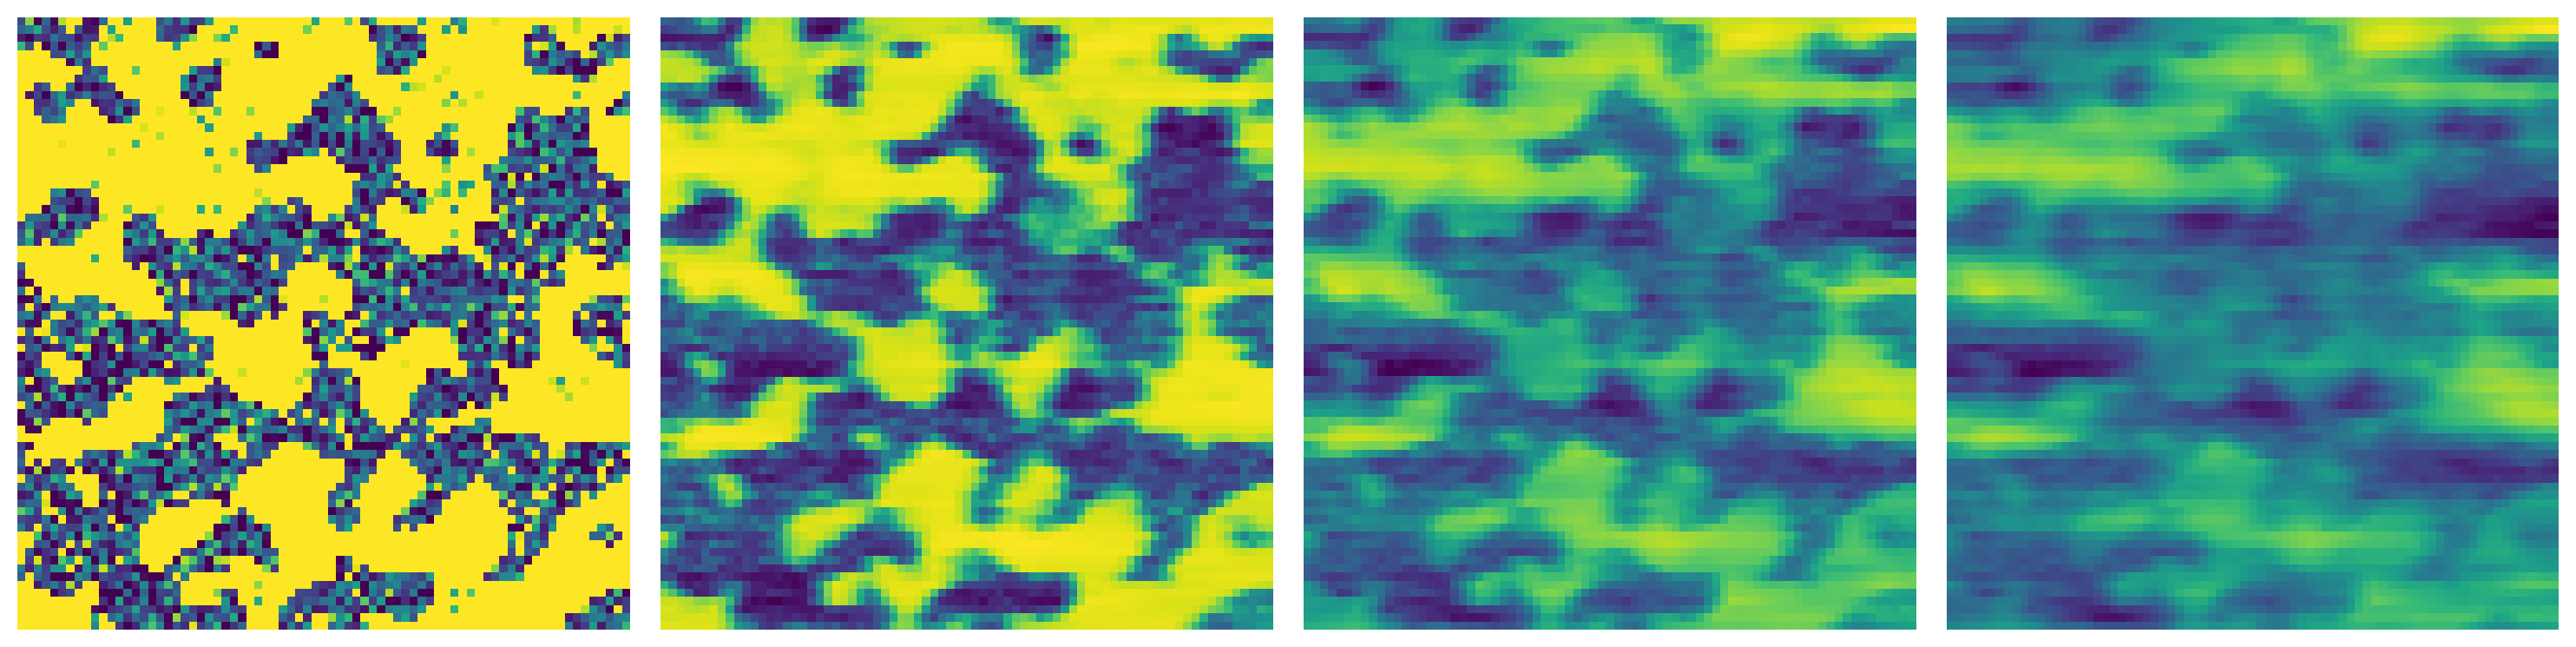

In [53]:
im_1 = ps.filters.nl_means_layered(im2, h=2)
im_2 = ps.filters.nl_means_layered(im2)
im_3 = ps.filters.nl_means_layered(im2, h=6)
fig, ax = plt.subplots(1, 4, figsize=[15, 5])
ax[0].imshow(im2[..., 15])
ax[0].axis(False);
ax[1].imshow(im_1[..., 15])
ax[1].axis(False);
ax[2].imshow(im_2[..., 15])
ax[2].axis(False);
ax[3].imshow(im_3[..., 15])
ax[3].axis(False);